# Introduction to the tidyverse
The [tidyverse](https://www.tidyverse.org/) is an opinionated collection of R packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures.

![tidyverse](../fig/tidyverse.jpg "title-1")

And you can load all these packages with a simple command

In [19]:
library(tidyverse)

As messages and warnings suggest, by loading tidyverse we are really loading a *set of packages*: ggplot2, dplyr, tidyr...

### The Pipe operator

Now we are going to have a rapid survey of some of these packages, but first you need to make friends with the **pipe** operator (**%>%** <- this guy here!). 

The pipe operator (also known out of the *R* world as **|**) has been first introduced by the developers of the **magrittr** package:

![Magrittr](../fig/magrittr.png "title-1")

This operator allows to concatenate a *R* value or the result of a *R* function with other *R* functions, the value at the left of the **%>%** will be interpret as the first value for the function at the right of it:

In [20]:
names(mtcars)
head(mtcars, n = 5)
mean(rnorm(100))

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] -0.04283267

Can be rewritten using a **%>%** as follows:

In [21]:
mtcars %>% names
mtcars %>% head(n = 5)
rnorm(10) %>% mean

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


[1] -0.522652

And....*so what*? Obviously....with more than one *pipe* you can build a pipeline...

What if I'd like to take the **5** cars with the highest mpg values, add to them standard normal noise and plot it?

Here a way to do it without a pipeline:

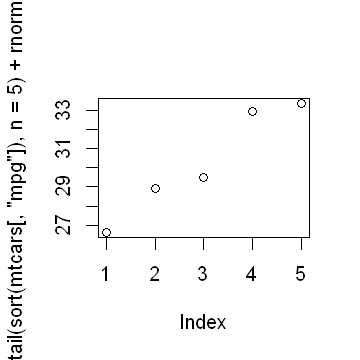

In [22]:
options(repr.plot.width=3, repr.plot.height=3) ### set a small plot size
plot(tail(sort(mtcars[, "mpg"]), n = 5) + rnorm(5))

And here a way to obtain the same result with a *pipeline*:

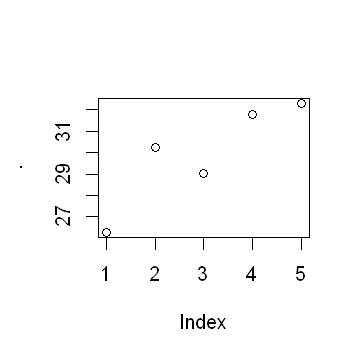

In [23]:
mtcars %>% pull(mpg) %>% sort %>% tail(n = 5) %>% `+`(rnorm(5)) %>% plot

*P.S.* here we used a trick: you can call operator functions like **+**, **-**, **\***, **/** and many others, simply by including them between two backticks \`\` (on windows you can obtain a backtick using the key combination ALT+96)

A last thing about **%>%**...it works even if the function at the right of the pipe does not want the value at the left of it as first argument. We can use the point **.** as placeholder, as example, this linear regression:

In [24]:
lm(mpg ~ cyl, mtcars)


Call:
lm(formula = mpg ~ cyl, data = mtcars)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


Can be *pipelinezed* as:

In [25]:
mtcars %>% lm(mpg ~ cyl, .)


Call:
lm(formula = mpg ~ cyl, data = .)

Coefficients:
(Intercept)          cyl  
     37.885       -2.876  


### DPLYR

After the pipe operator we can start with the first useful package of the tidyverse, **dplyr**:

![DPLYR](../fig/dplyr_small.png "title-1")

This package is the *de-facto* standard for data manipulation in modern R.

It consists of *single table* verbs to manipulate a single table:


In [26]:
mtcars %>% sample_n(5) -> smcars # randomly choosy five cars
smcars %>% pull(cyl) %>% max -> max_cyl
max_cyl
smcars
smcars %>% filter(cyl == max_cyl) # choose cars with six cylinders
smcars %>% arrange(desc(hp)) # arrange the cars by descending hp
smcars %>% select(carb, cyl) # select only two columns of the datasets
smcars %>% rename(cylinder = cyl, horsepower = hp) # rename some variable
smcars %>% mutate(cyl = 2 * cyl, tot = am + gear + carb) # create new columns or modify old ones
smcars %>% summarise(mean_hp = mean(hp))

[1] 8

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


Warning message:
"package 'bindrcpp' was built under R version 3.4.2"

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15.8,8,351.0,264,4.22,3.17,14.5,0,1,5,4
16.4,8,275.8,180,3.07,4.07,17.4,0,0,3,3


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


,carb,cyl
Ford Pantera L,4,8
Merc 450SE,3,8
Merc 280C,4,6
Hornet 4 Drive,1,6
Datsun 710,1,4


,mpg,cylinder,disp,horsepower,drat,wt,qsec,vs,am,gear,carb
Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,tot
15.8,16,351.0,264,4.22,3.170,14.50,0,1,5,4,10
16.4,16,275.8,180,3.07,4.070,17.40,0,0,3,3,6
17.8,12,167.6,123,3.92,3.440,18.90,1,0,4,4,8
21.4,12,258.0,110,3.08,3.215,19.44,1,0,3,1,4
22.8,8,108.0,93,3.85,2.320,18.61,1,1,4,1,6


mean_hp
154


The **group_by** operation to change the way in which some *single table verbs* are applied to the table:

In [27]:
mtcars %>% group_by(cyl) %>% summarise(hp = mean(hp)) # mean hp for each cyl value
mtcars %>% group_by(cyl) %>% sample_n(2) # randomly choose two samples for each cyl value
mtcars %>% group_by(cyl) %>% mutate(mean_hp_by_cyl = mean(hp)) %>% arrange(desc(cyl)) %>% sample_n(1) # what does it do? 

cyl,hp
4,82.63636
6,122.28571
8,209.21429


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mean_hp_by_cyl
21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,82.63636
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,122.28571
16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3,209.21429


And also *two tables verbs*, in particular **joins**:

In [28]:
mtcars$name <- rownames(mtcars)
mtcars_table_1 <- mtcars %>% select(name, hp) %>% head(n = 10)
mtcars_table_2 <- mtcars %>% select(name, cyl,hp) %>% head(n = 10) %>% sample_n(5) %>%  mutate(hp = 2 * hp)

mtcars_table_1
mtcars_table_2

mtcars_table_1 %>% left_join(mtcars_table_2, by = "name", suffix = c("_one", "_two"))
mtcars_table_1 %>% right_join(mtcars_table_2, by = "name", suffix = c("_one", "_two"))
mtcars_table_2 %>% inner_join(mtcars_table_1, by = "name", suffix = c("_two", "_one"))

,name,hp
Mazda RX4,Mazda RX4,110
Mazda RX4 Wag,Mazda RX4 Wag,110
Datsun 710,Datsun 710,93
Hornet 4 Drive,Hornet 4 Drive,110
Hornet Sportabout,Hornet Sportabout,175
Valiant,Valiant,105
Duster 360,Duster 360,245
Merc 240D,Merc 240D,62
Merc 230,Merc 230,95
Merc 280,Merc 280,123


name,cyl,hp
Hornet 4 Drive,6,220
Hornet Sportabout,8,350
Valiant,6,210
Datsun 710,4,186
Mazda RX4 Wag,6,220


name,hp_one,cyl,hp_two
Mazda RX4,110,NA,NA
Mazda RX4 Wag,110,6,220
Datsun 710,93,4,186
Hornet 4 Drive,110,6,220
Hornet Sportabout,175,8,350
Valiant,105,6,210
Duster 360,245,NA,NA
Merc 240D,62,NA,NA
Merc 230,95,NA,NA
Merc 280,123,NA,NA


name,hp_one,cyl,hp_two
Hornet 4 Drive,110,6,220
Hornet Sportabout,175,8,350
Valiant,105,6,210
Datsun 710,93,4,186
Mazda RX4 Wag,110,6,220


name,cyl,hp_two,hp_one
Hornet 4 Drive,6,220,110
Hornet Sportabout,8,350,175
Valiant,6,210,105
Datsun 710,4,186,93
Mazda RX4 Wag,6,220,110


But there is a lot more about **dplyr** and his friends but we have no more time, but you do! So here's some links:

* [Window functions](https://cran.r-project.org/web/packages/dplyr/vignettes/window-functions.html) to compute cumulative sum, mean or build rankins among observations
* More [two table verbs](https://cran.r-project.org/web/packages/dplyr/vignettes/two-table.html) to compute, as example, union, intersection, and symmetric difference of tables
* [Deep dive](https://cran.r-project.org/web/packages/dplyr/vignettes/programming.html) in the way **dplyr** is built and how to effectively use it to write custom verbs
* How to use dplyr as frontend to standard databases ([dbplyr](https://cran.r-project.org/web/packages/dbplyr/index.html)) or big data stacks ([sparklyr](http://spark.rstudio.com/dplyr/))

### GGPLOT

Another great package in tidyverse is [ggplot](http://ggplot2.org/) a versatile plotting system. The full introduction to this package is out of the scope of this lesson (but it's covered during the R course!).

![ggplot](../fig/ggplot.png "title-1")

In the following lessons we are going to use  ggplot extensively, if you have some doubts on its functioning let us know! :)

In the following an example of its capabilities:

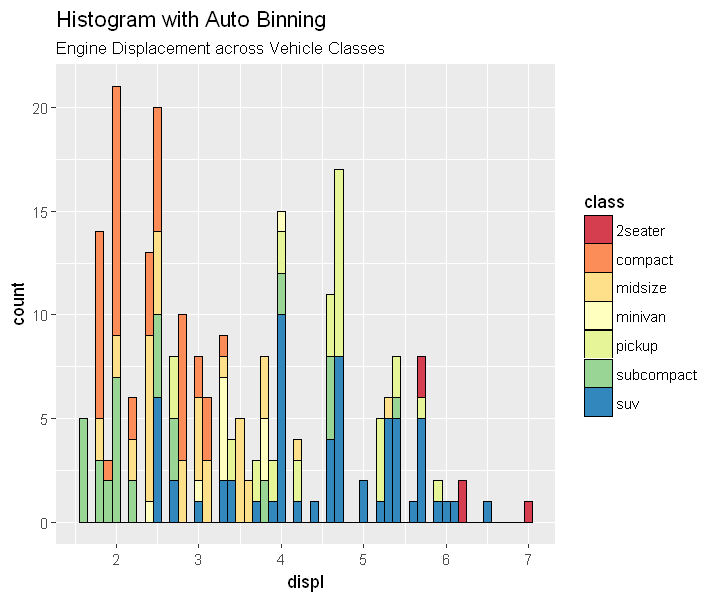

In [29]:
options(repr.plot.width=6, repr.plot.height=5)
mpg %>%  ggplot(aes(displ)) + scale_fill_brewer(palette = "Spectral") + geom_histogram(aes(fill=class), 
                   binwidth = .1, 
                   col="black", 
                   size=.1) +  # change binwidth
  labs(title="Histogram with Auto Binning", 
       subtitle="Engine Displacement across Vehicle Classes")  

### TIDYR

![ggplot](../fig/tidyr.jpg "title-1")

TODO

### Other packages

We have no time to explore them, but here a short description from the [tidyverse](https://www.tidyverse.org/) website:

* **stringr** provides a cohesive set of functions designed to make working with strings as easy as possible. It is built on top of stringi, which uses the ICU C library to provide fast, correct implementations of common string manipulations.
* **tibble**  is a modern re-imagining of the data frame, keeping what time has proven to be effective, and throwing out what it has not. Tibbles are data.frames that are lazy and surly: they do less and complain more forcing you to confront problems earlier, typically leading to cleaner, more expressive code
* **forcats** forcats provides a suite of useful tools that solve common problems with factors. R uses factors to handle categorical variables, variables that have a fixed and known set of possible values.
* **purrr** enhances R’s functional programming (FP) toolkit by providing a complete and consistent set of tools for working with functions and vectors. Once you master the basic concepts, purrr allows you to replace many for loops with code that is easier to write and more expressive.
* **readr** provides a fast and friendly way to read rectangular data (like csv, tsv, and fwf). It is designed to flexibly parse many types of data found in the wild, while still cleanly failing when data unexpectedly changes.
